## Obtaining the data

In [1]:
import pandas as pd
from sodapy import Socrata

federal_client = Socrata(
    "healthdata.gov",
    'PmTWj6hExEV3muUjErx8lqo9h',
    username = '67mk7nwz4pplnp23qzuogdbrb',
    password = '4j8ensof75ev2hs3ew4njx89hx1v9gvhzedtsssu0rptc9iu9a'
)

hospital_query = """
SELECT
    hospital_pk,
    hospital_name,
    collection_week,
    state,
    fips_code,
    geocoded_hospital_address,
    total_personnel_covid_vaccinated_doses_none_7_day AS no_dose_personnel,
    total_personnel_covid_vaccinated_doses_one_7_day AS one_dose_personnel,
    total_personnel_covid_vaccinated_doses_all_7_day AS two_dose_personnel
WHERE
    collection_week >= '2021-04-01T00:00:00.000'
LIMIT
    300000
"""

survey_results = federal_client.get(
    "anag-cw7u", 
    content_type = 'json',
    query = hospital_query
)

survey_results_df = pd.DataFrame.from_records(survey_results)

In [2]:
survey_results_df = survey_results_df.astype({
    'hospital_pk': 'category',
    'hospital_name': 'object',
    'collection_week': 'datetime64',
    'state': 'object',
    'fips_code': 'category',
    'geocoded_hospital_address': 'object',
    'no_dose_personnel': 'float_',
    'one_dose_personnel': 'float_',
    'two_dose_personnel': 'float_'
})


survey_results_df.to_pickle('survey_results.pkl')
survey_results_df

,hospital_pk,hospital_name,collection_week,state,fips_code,geocoded_hospital_address,no_dose_personnel,one_dose_personnel,two_dose_personnel
0,291314,SOUTH LYON MEDICAL CENTER,2021-04-02,NV,32019,NaN,NaN,NaN,NaN
1,292003,HORIZON SPECIALTY HOSPITAL,2021-04-02,NV,32003,NaN,NaN,NaN,NaN
2,370178,MEMORIAL HOSPITAL,2021-04-02,OK,40001,"{'type': 'Point', 'coordinates': [-94.643134, ...",81.0,0.0,92.0
3,330151,ST JAMES HOSPITAL,2021-04-02,NY,36101,"{'type': 'Point', 'coordinates': [-77.662034, ...",96.0,12.0,242.0
4,450808,NORTHWEST HILLS SURGICAL HOSPITAL,2021-04-02,TX,48453,"{'type': 'Point', 'coordinates': [-97.751025, ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
210440,192028,RIVERBRIDGE SPECIALTY HOSPITAL,2022-01-14,LA,22029,"{'type': 'Point', 'coordinates': [-91.41918, 3...",65.0,120.0,118.0
210441,390079,ROBERT PACKER HOSPITAL,2022-01-14,PA,42015,NaN,217.0,1604.0,1632.0
210442,501327,WHITMAN HOSPITAL AND MEDICAL CENTER,2022-01-14,WA,53075,"{'type': 'Point', 'coordinates': [-117.375012,...",NaN,NaN,NaN
210443,100292,SACRED HEART HOSPITAL ON THE EMERALD COAST,2022-01-14,FL,12131,"{'type': 'Point', 'coordinates': [-86.306988, ...",NaN,NaN,NaN


In [3]:
survey_results_df.collection_week.unique()

array(['2021-04-02T00:00:00.000000000', '2021-04-09T00:00:00.000000000',
       '2021-04-16T00:00:00.000000000', '2021-04-23T00:00:00.000000000',
       '2021-04-30T00:00:00.000000000', '2021-05-07T00:00:00.000000000',
       '2021-05-14T00:00:00.000000000', '2021-05-21T00:00:00.000000000',
       '2021-05-28T00:00:00.000000000', '2021-06-04T00:00:00.000000000',
       '2021-06-11T00:00:00.000000000', '2021-06-18T00:00:00.000000000',
       '2021-06-25T00:00:00.000000000', '2021-07-02T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-16T00:00:00.000000000',
       '2021-07-23T00:00:00.000000000', '2021-07-30T00:00:00.000000000',
       '2021-08-06T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2021-08-20T00:00:00.000000000', '2021-08-27T00:00:00.000000000',
       '2021-09-03T00:00:00.000000000', '2021-09-10T00:00:00.000000000',
       '2021-09-17T00:00:00.000000000', '2021-09-24T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-10-08

Dates we'll look at:
- April 9th 2021 (the day used in the original map)
- November 5th 2021 (the day after the [Biden administration](https://www.whitehouse.gov/briefing-room/statements-releases/2021/11/04/fact-sheet-biden-administration-announces-details-of-two-major-vaccination-policies/) announced
a requirement for healthcare workers to be vaccinated)
- January 14th 2022 (the most recent response, and 10 days after
the original date given by the for Biden administration for when
healthcare workers would need to be vaccinated by)

In [4]:
cdc_client = Socrata(
    "data.cdc.gov",
    'PmTWj6hExEV3muUjErx8lqo9h',
    username = '67mk7nwz4pplnp23qzuogdbrb',
    password = '4j8ensof75ev2hs3ew4njx89hx1v9gvhzedtsssu0rptc9iu9a'
)

covid_query = """
SELECT
    date,
    fips,
    recip_county,
    recip_state,
    Administered_Dose1_Recip_18PlusPop_Pct AS one_dose_pop,
    Series_Complete_18PlusPop_Pct AS two_dose_pop,
    census2019 AS county_pop_size
WHERE
    date IN (
        '2021-04-09T00:00:00.000',
        '2021-11-05T00:00:00.000',
        '2022-01-14T00:00:00.000'
    )
LIMIT
    10000
"""

county_covid = cdc_client.get("8xkx-amqh", query = covid_query)
county_covid_df = pd.DataFrame.from_records(county_covid)

county_covid_df = county_covid_df.astype({
    'date': 'datetime64',
    'fips': 'category',
    'recip_county': 'object',
    'recip_state': 'object',
    'one_dose_pop': 'float_',
    'two_dose_pop': 'float',
    'county_pop_size': 'float_'
})

county_covid_df.to_pickle('county_covid.pkl')
county_covid_df

,date,fips,recip_county,recip_state,one_dose_pop,two_dose_pop,county_pop_size
0,2021-04-09,13239,Quitman County,GA,9.7,6.2,2299.0
1,2021-04-09,13209,Montgomery County,GA,12.6,8.3,9172.0
2,2021-04-09,27161,Waseca County,MN,42.2,27.0,18612.0
3,2021-04-09,15009,Maui County,HI,0.0,0.0,167417.0
4,2021-04-09,UNK,Unknown County,MD,0.0,0.0,NaN
...,...,...,...,...,...,...,...
9843,2022-01-14,19087,Henry County,IA,67.0,62.2,19954.0
9844,2022-01-14,55037,Florence County,WI,65.1,60.7,4295.0
9845,2022-01-14,48391,Refugio County,TX,69.8,62.1,6948.0
9846,2022-01-14,47011,Bradley County,TN,54.8,48.7,108110.0


## Exploring data quality issues

In [5]:
import numpy as np
import matplotlib.pyplot as plt  

In [6]:
survey_results_df = pd.read_pickle('survey_results.pkl')
county_covid_df = pd.read_pickle('county_covid.pkl')

In [7]:
# Replacing suppressed values with 0 for purposes of calculation
survey_results_df = survey_results_df.replace(-999999, 0)

In [8]:
obs_data = survey_results_df.dropna(
    subset = ['no_dose_personnel', 'one_dose_personnel', 'two_dose_personnel']
)

obs_data

,hospital_pk,hospital_name,collection_week,state,fips_code,geocoded_hospital_address,no_dose_personnel,one_dose_personnel,two_dose_personnel
2,370178,MEMORIAL HOSPITAL,2021-04-02,OK,40001,"{'type': 'Point', 'coordinates': [-94.643134, ...",81.0,0.0,92.0
3,330151,ST JAMES HOSPITAL,2021-04-02,NY,36101,"{'type': 'Point', 'coordinates': [-77.662034, ...",96.0,12.0,242.0
5,100289,CLEVELAND CLINIC HOSPITAL,2021-04-02,FL,12011,"{'type': 'Point', 'coordinates': [-80.365467, ...",1327.0,2108.0,1925.0
6,440073,MAURY REGIONAL HOSPITAL,2021-04-02,TN,47119,"{'type': 'Point', 'coordinates': [-87.065768, ...",1290.0,1614.0,1553.0
9,100071,BRAVERA HEALTH BROOKSVILLE,2021-04-02,FL,12053,"{'type': 'Point', 'coordinates': [-82.443386, ...",497.0,120.0,360.0
...,...,...,...,...,...,...,...,...,...
210436,271312,PHILLIPS COUNTY MEDICAL CENTER,2022-01-14,MT,30071,"{'type': 'Point', 'coordinates': [-107.860356,...",0.0,0.0,0.0
210437,440068,STARR REGIONAL MEDICAL CENTER ATHENS,2022-01-14,TN,47107,"{'type': 'Point', 'coordinates': [-84.608109, ...",238.0,0.0,419.0
210439,150126,FRANCISCAN HEALTH CROWN POINT,2022-01-14,IN,18089,"{'type': 'Point', 'coordinates': [-87.364438, ...",0.0,0.0,0.0
210440,192028,RIVERBRIDGE SPECIALTY HOSPITAL,2022-01-14,LA,22029,"{'type': 'Point', 'coordinates': [-91.41918, 3...",65.0,120.0,118.0


In [9]:
# Some of the hospitals appear to have A LOT of people
obs_data[obs_data['no_dose_personnel'] > 50000]

,hospital_pk,hospital_name,collection_week,state,fips_code,geocoded_hospital_address,no_dose_personnel,one_dose_personnel,two_dose_personnel
98204,190008,TERREBONNE GENERAL HEALTH SYSTEM,2021-08-13,LA,22109,"{'type': 'Point', 'coordinates': [-90.714461, ...",69912.0,1085.0,973.0
107739,190008,TERREBONNE GENERAL HEALTH SYSTEM,2021-08-27,LA,22109,"{'type': 'Point', 'coordinates': [-90.714461, ...",69912.0,1085.0,973.0
113216,190008,TERREBONNE GENERAL HEALTH SYSTEM,2021-09-03,LA,22109,"{'type': 'Point', 'coordinates': [-90.714461, ...",69912.0,1085.0,973.0
117989,190008,TERREBONNE GENERAL HEALTH SYSTEM,2021-09-10,LA,22109,"{'type': 'Point', 'coordinates': [-90.714461, ...",69912.0,1085.0,973.0
176726,521323,MARSHFIELD MEDICAL CENTER - NEILLSVILLE,2021-12-03,WI,55019,"{'type': 'Point', 'coordinates': [-90.618745, ...",520037.0,520037.0,520037.0


<AxesSubplot:xlabel='collection_week'>

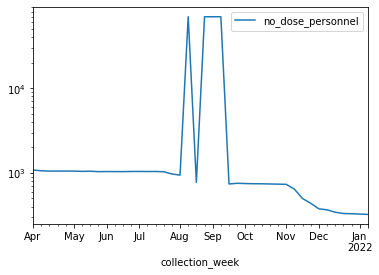

In [10]:
# Let's see what happens when we look at these hospitals
obs_data[obs_data['hospital_pk'] == '190008'].plot(
    x = 'collection_week',
    y = 'no_dose_personnel',
    logy = True
)

<AxesSubplot:xlabel='collection_week'>

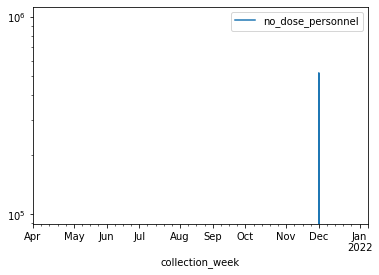

In [11]:
# Let's see what happens when we look at these hospitals
obs_data[obs_data['hospital_pk'] == '521323'].plot(
    x = 'collection_week',
    y = 'no_dose_personnel',
    logy = True
)

From this, we can see that some of the hospitals have issues with the variables
being coded over time (in that they are misrecorded substantially over time). If
we wanted to go into this in more depth, we could try and impute the correct values,
but for now, the easiest thing to try and do is to simple try and identify these outlier
values. Given how substantially large these deviations are, we can just use a standard
outlier detection procedure for this (i.e the 1.5 IQR rule).

In [12]:
# Note that there are issues with how the one_shot_personnel
# variable is coded
obs_data[obs_data['one_dose_personnel'] < obs_data['two_dose_personnel']]

,hospital_pk,hospital_name,collection_week,state,fips_code,geocoded_hospital_address,no_dose_personnel,one_dose_personnel,two_dose_personnel
2,370178,MEMORIAL HOSPITAL,2021-04-02,OK,40001,"{'type': 'Point', 'coordinates': [-94.643134, ...",81.0,0.0,92.0
3,330151,ST JAMES HOSPITAL,2021-04-02,NY,36101,"{'type': 'Point', 'coordinates': [-77.662034, ...",96.0,12.0,242.0
9,100071,BRAVERA HEALTH BROOKSVILLE,2021-04-02,FL,12053,"{'type': 'Point', 'coordinates': [-82.443386, ...",497.0,120.0,360.0
16,141317,GIBSON COMMUNITY HOSPITAL,2021-04-02,IL,17053,"{'type': 'Point', 'coordinates': [-88.370719, ...",0.0,0.0,760.0
19,300005,CONCORD HOSPITAL- LACONIA,2021-04-02,NH,33001,"{'type': 'Point', 'coordinates': [-71.460756, ...",226.0,25.0,949.0
...,...,...,...,...,...,...,...,...,...
210433,230230,EDWARD W SPARROW HOSPITAL,2022-01-14,MI,26065,"{'type': 'Point', 'coordinates': [-84.534816, ...",1026.0,125.0,4400.0
210434,010125,LAKELAND COMMUNITY HOSPITAL,2022-01-14,AL,01133,"{'type': 'Point', 'coordinates': [-87.589857, ...",47.0,15.0,211.0
210435,450128,KNAPP MEDICAL CENTER,2022-01-14,TX,48215,"{'type': 'Point', 'coordinates': [-97.977495, ...",162.0,131.0,824.0
210437,440068,STARR REGIONAL MEDICAL CENTER ATHENS,2022-01-14,TN,47107,"{'type': 'Point', 'coordinates': [-84.608109, ...",238.0,0.0,419.0


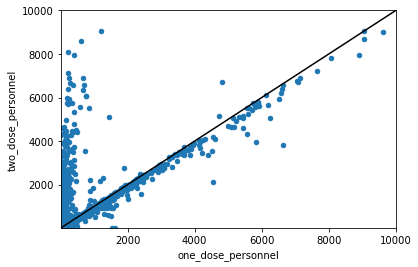

In [17]:
ax = obs_data[obs_data['collection_week'] == '2021-04-02'].plot.scatter(
    x = 'one_dose_personnel',
    y = 'two_dose_personnel'
)

ax.set_xlim(10, 10000)
ax.set_ylim(10, 10000)
ax.axline((1, 1), slope=1, c='k')

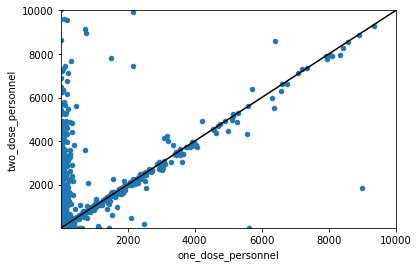

In [19]:
ax = obs_data[obs_data['collection_week'] == '2022-01-14'].plot.scatter(
    x = 'one_dose_personnel',
    y = 'two_dose_personnel'
)

ax.set_xlim(10, 10000)
ax.set_ylim(10, 10000)
ax.axline((1, 1), slope=1, c='k')

In [22]:
# Is the coding error consistent across hospitals?
obs_data['correct_coding'] = np.where(obs_data['one_dose_personnel'] > obs_data['two_dose_personnel'], 1, 0)

<ipython-input-22-967a17d88056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_data['correct_coding'] = np.where(obs_data['one_dose_personnel'] > obs_data['two_dose_personnel'], 1, 0)


,hospital_pk,hospital_name,collection_week,state,fips_code,geocoded_hospital_address,no_dose_personnel,one_dose_personnel,two_dose_personnel,correct_coding
2,370178,MEMORIAL HOSPITAL,2021-04-02,OK,40001,"{'type': 'Point', 'coordinates': [-94.643134, ...",81.0,0.0,92.0,0
3,330151,ST JAMES HOSPITAL,2021-04-02,NY,36101,"{'type': 'Point', 'coordinates': [-77.662034, ...",96.0,12.0,242.0,0
5,100289,CLEVELAND CLINIC HOSPITAL,2021-04-02,FL,12011,"{'type': 'Point', 'coordinates': [-80.365467, ...",1327.0,2108.0,1925.0,1
6,440073,MAURY REGIONAL HOSPITAL,2021-04-02,TN,47119,"{'type': 'Point', 'coordinates': [-87.065768, ...",1290.0,1614.0,1553.0,1
9,100071,BRAVERA HEALTH BROOKSVILLE,2021-04-02,FL,12053,"{'type': 'Point', 'coordinates': [-82.443386, ...",497.0,120.0,360.0,0
...,...,...,...,...,...,...,...,...,...,...
210436,271312,PHILLIPS COUNTY MEDICAL CENTER,2022-01-14,MT,30071,"{'type': 'Point', 'coordinates': [-107.860356,...",0.0,0.0,0.0,0
210437,440068,STARR REGIONAL MEDICAL CENTER ATHENS,2022-01-14,TN,47107,"{'type': 'Point', 'coordinates': [-84.608109, ...",238.0,0.0,419.0,0
210439,150126,FRANCISCAN HEALTH CROWN POINT,2022-01-14,IN,18089,"{'type': 'Point', 'coordinates': [-87.364438, ...",0.0,0.0,0.0,0
210440,192028,RIVERBRIDGE SPECIALTY HOSPITAL,2022-01-14,LA,22029,"{'type': 'Point', 'coordinates': [-91.41918, 3...",65.0,120.0,118.0,1


<AxesSubplot:>

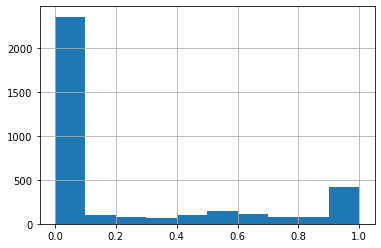

In [24]:
# Note that it is mostly consistent whether hospitals always have
# correct coding or not 
obs_data.groupby('hospital_pk')['correct_coding'].mean().hist()

## Computing data quality metrics

Data quality issues to consider:
- Indicator for whether vaccination rates are reported
    - I mean, if it's not reported, it's not exactly good data, no?
- Non-positive number of workers
    - If a hospital has no workers, either something is up
    with the reporting, or there's something REALLY 
    interesting going on.
- Substantial changes in workers over time
    - Sometimes the number of individuals in a particular group
    within the same hospital changes substantially (e.g by
    multiple orders of magnitude) over a short time period.
- More fully vaccinated workers than "one shot or more" workers
    - This is probably due to ambiguity in how the variable
    is coded (the description is contradictory in its
    intent, and what is meant to be captured by it).
- Looking at standard deviations of not vaccinated percentages
in a hospital away from the population percentages in a county
    - If this is slightly negative, or **substantially** positive,
    then this could be evidence that there is something amiss here,
    as we would expect healthcare workers to be, if anything,
    more likely to be vaccinated than the population they are in.
    Significantly positive deviations would suggest a possible
    overestimation in counts, whereas slightly negative or
    significantly negative deviations could suggest underreporting.

Workflow for computing metrics/summary statistics:
- Is the data actually reported? (Indicated by `data_reported`)
    - Are there vaccination rates reported? If not, stop here.
    - Does the hosital report all zeros for these values? If so,
    then flag `data_reported` as zero (which is different from
    the `NA` coding given if they are actually missing). 
- Is the data coded correctly? (Indicated by `correct_coding`)
    - Note that the `one_dose_personnel` should be higher
    than the `two_dose_personnel`, as the `one_dose_personnel`
    variable corresponds to the number of workers with one
    dose or more.
    - If `one_dose_personnel < two_dose_personnel`, set `correct_coding = 0`,
    otherwise set `correct_coding = 0`
- Computing some summary statistics:
    - `total_personnel = no_dose_personnel + max(one_dose_personnel,two_dose_personnel)`
    - `percentage_unvacc = no_dose_personnel/total_personnel`
    - Note that for entries with `correct_coding = 0`, the estimate
    for the number of `total_personnel` may be (wildly) incorrect; the
    max is a hack to try and account for possible discrepancies in the reporting.
- Comparing number of workers in a hospital over time:
    - Group by the hospital
    - If the `total_personnel` on a particular date is 
    less than LQR - 1.5IQR or more than UQR + 1.5IQR over
    the number of workers , flag `possible_incorrect_count = 1`
- Comparing the unvaccinated rate in a hospital re: the
proportion of the state in general
    - Note that we have CDC estimates, on a county level,
    of those not vaccinated. We can compute the difference
    between the hospital level and this, with respect to
    the 'standard error' of the proportion within the
    hospital (assuming they are a representative sample
    of the population); the idea is that if these values are
    large, then this may be a sign of something wrong (as
    according to the reasoning above).    
    - This is kept in a variable called `std_error_away_from_county_pop`    

In [30]:
# I did this in R as I can do it a lot quicker in R....

## Exploratory data analysis

A few interesting questions to explore:
- Has the percentage of hospitals reporting vaccination data changed over time?
- Has there been a spike in the vaccination rates in hospital workers as particular
time periods arise?